In [2]:
# Import data and libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r'/content/drive/MyDrive/Data Science in Finance/python-material/Final Project/data/data_for_modelling.csv')

In [3]:
df['loan_default'] = df.loan_status == "Charged Off"
df['loan_default'].value_counts()

,count
loan_default,
False,84911
True,12382


In [5]:
#Carrying out same steps to acquire features as in baseline model
df_no_extreme_income = df.drop(df['annual_inc'].idxmax())
df_no_extreme_income['adjusted_annual_inc'] = df['annual_inc'].replace(0, 1)
df_no_extreme_income['hardship_dpd'].fillna(0, inplace=True)
df_no_extreme_income['dti'].fillna(0,inplace=True)
features = ['fico_range_high', 'fico_range_low', 'adjusted_annual_inc', 'dti','hardship_dpd']

<ipython-input-5-e17538afd479>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_no_extreme_income['hardship_dpd'].fillna(0, inplace=True)
<ipython-input-5-e17538afd479>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [6]:
X = df_no_extreme_income[features]
y = df_no_extreme_income['loan_default']
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
# Create a pipeline containing an imputer and scaler to handle NaNs
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
    ('model', DecisionTreeClassifier(max_depth = 5))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for dframe in [X_train, X_test, y_train, y_test]:
    print(f"Shape: {dframe.shape}")

pipeline.fit(X, y)

Shape: (77833, 5)
Shape: (19459, 5)
Shape: (77833,)
Shape: (19459,)


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', RobustScaler()),
                ('model', DecisionTreeClassifier(max_depth=5))])

In [7]:
prediction = pipeline.predict(X_test)

In [8]:
from sklearn import tree
decision_tree_model = pipeline.named_steps['model']

[Text(0.48125, 0.9166666666666666, 'x[0] <= -0.056\ngini = 0.222\nsamples = 97292\nvalue = [84910, 12382]'),
 Text(0.22916666666666666, 0.75, 'x[3] <= 0.279\ngini = 0.274\nsamples = 48209\nvalue = [40314.0, 7895.0]'),
 Text(0.35520833333333335, 0.8333333333333333, 'True  '),
 Text(0.125, 0.5833333333333334, 'x[4] <= 13.5\ngini = 0.247\nsamples = 31341\nvalue = [26808, 4533]'),
 Text(0.06666666666666667, 0.4166666666666667, 'x[2] <= -0.07\ngini = 0.246\nsamples = 31194\nvalue = [26724, 4470]'),
 Text(0.03333333333333333, 0.25, 'x[3] <= -0.461\ngini = 0.27\nsamples = 13283\nvalue = [11145, 2138]'),
 Text(0.016666666666666666, 0.08333333333333333, 'gini = 0.246\nsamples = 4881\nvalue = [4179, 702]'),
 Text(0.05, 0.08333333333333333, 'gini = 0.283\nsamples = 8402\nvalue = [6966, 1436]'),
 Text(0.1, 0.25, 'x[1] <= -0.5\ngini = 0.226\nsamples = 17911\nvalue = [15579, 2332]'),
 Text(0.08333333333333333, 0.08333333333333333, 'gini = 0.249\nsamples = 8174\nvalue = [6984, 1190]'),
 Text(0.116666

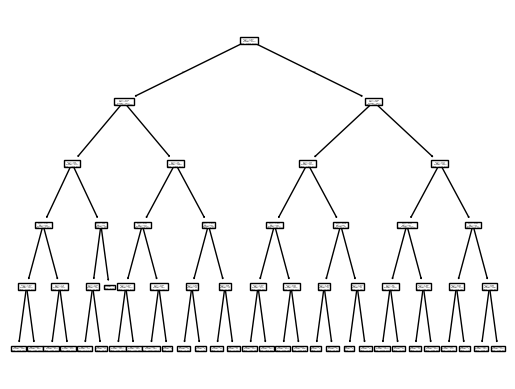

In [9]:
tree.plot_tree(decision_tree_model)

In [10]:
# Predict on the test set
predictions = pipeline.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
# Calculate metrics
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1= f1_score(y_test, prediction)
roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:,1])

In [11]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'ROC-AUC: {roc_auc}')

Accuracy: 0.872501156277301
Precision: 0.7407407407407407
Recall: 0.00801924619085806
F1-Score: 0.01586671955573185
ROC-AUC: 0.6313575451700054


In [12]:
#Implementing SMOTE oversampling to try and reduce chance of model learning what is a positive vs finding negatives
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [13]:
pipeline.fit(X_resampled, y_resampled)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', RobustScaler()),
                ('model', DecisionTreeClassifier(max_depth=5))])

In [14]:
y_pred2 = pipeline.predict(X_test)

In [15]:
accuracy_2 = accuracy_score(y_test, y_pred2)
precision_2 = precision_score(y_test, y_pred2)
recall_2 = recall_score(y_test, y_pred2)
f1_2 = f1_score(y_test, y_pred2)
roc_auc_2 = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:,1])

In [16]:
print(f'Accuracy: {accuracy_2}')
print(f'Precision: {precision_2}')
print(f'Recall: {recall_2}')
print(f'F1-Score: {f1_2}')
print(f'ROC-AUC: {roc_auc_2}')

Accuracy: 0.4994090138239375
Precision: 0.1618292113859076
Recall: 0.6952686447473937
F1-Score: 0.2625482625482625
ROC-AUC: 0.5869750708508555


## Utilising a Keras model for modelling

In [24]:
df['adjusted_annual_inc'] = df['annual_inc'].replace(0, 1)

from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler1 = StandardScaler()
# Label encoding
le = LabelEncoder()
df['grade_encoded'] = le.fit_transform(df['grade'])
df[['grade', 'grade_encoded']].head()

cap_value = df['last_pymnt_amnt'].quantile(0.95)
df['last_pymnt_amnt_capped'] = np.where(df['last_pymnt_amnt'] > cap_value, cap_value, df['last_pymnt_amnt'])

df[['loan_amnt_std', 'annual_inc_std']] = scaler1.fit_transform(df[['loan_amnt', 'annual_inc']])

In [28]:
new_features = ['fico_range_high', 'fico_range_low', 'adjusted_annual_inc',
                'dti','hardship_dpd', 'tot_cur_bal',
       'open_acc_6m', 'open_il_24m', 'total_bal_il', 'inq_fi',
       'acc_open_past_24mths', 'bc_util', 'mo_sin_old_il_acct',
       'percent_bc_gt_75', 'total_il_high_credit_limit',
       'last_pymnt_amnt_capped', 'grade_encoded', 'annual_inc_std']
X_2 = df[new_features]

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

#Apply SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_2)

# Apply MinMaxScaler
scaler2 = MinMaxScaler()
X_scaled = scaler2.fit_transform(X_imputed)

# Convert back to DataFrame with same column names
X_scaled_df = pd.DataFrame(X_scaled, columns=new_features)
X_scaled_df.head()
y_2 = df['loan_default']

In [31]:
#Running a train test split
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (returns pandas dfs)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled_df, y_2, test_size=0.25, random_state=42)

In [32]:
#Importing models from keras
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU,Dropout

model = Sequential()
model.add(Dense(18, input_dim=X_scaled_df.shape[1], activation='relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall', 'AUC']
    )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
final_model = model.fit(X_train2, y_train2, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1825/1825 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - AUC: 0.6809 - Precision: 0.2640 - Recall: 0.0474 - accuracy: 0.8547 - loss: 0.3790 - val_AUC: 0.8113 - val_Precision: 0.5468 - val_Recall: 0.1607 - val_accuracy: 0.8789 - val_loss: 0.3032
Epoch 2/10
1825/1825 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - AUC: 0.8112 - Precision: 0.5504 - Recall: 0.1017 - accuracy: 0.8769 - loss: 0.3022 - val_AUC: 0.8164 - val_Precision: 0.5659 - val_Recall: 0.1442 - val_accuracy: 0.8797 - val_loss: 0.2983
Epoch 3/10
1825/1825 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - AUC: 0.8190 - Precision: 0.5734 - Recall: 0.1266 - accuracy: 0.8750 - loss: 0.3027 - val_AUC: 0.8204 - val_Precision: 0.5904 - val_Recall: 0.0881 - val_accuracy: 0.8789 - val_loss: 0.2957
Epoch 4/10
1825/1825 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - AUC: 0.8237 - Precision: 0.5656 - Recall: 0.1171 - accuracy: 0.8741 - loss: 0.3011 - val_AUC: 0.8261 - val_Precision: 0.6058 - val_Recall: 0.1040 - val_accuracy: 0.8800 - val_loss: 0.2921
Epoch 5/10
1825/1825 ━━

ROC-AUC: 0.8425 - Precision: 0.6180 - Recall: 0.1494 - accuracy: 0.8813

Which is significantly better than both the baseline model and the Decision Tree